<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio Visualización

En este laboratorio usaremos el DataFrame de Netflix completo creado en los primeros laboratorios de Pandas. 

**Instrucciones:**

1. Lee cuidadosamente el enunciado de cada ejercicio.

2. Implementa la solución en la celda de código proporcionada.

3. Debes incluir después de cada gráfica la interpretación de las mismas en una celda de markdown. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_netflix_original = pd.read_csv("datos/netflix_originals.csv")
df_netflix_titles = pd.read_csv("datos/netflix_titles.csv")

In [3]:
df_resultado_merge= df_netflix_original.merge(df_netflix_titles, left_on='Title', right_on='title', how='right')
df_resultado_merge
df_resultado_merge.to_csv("datos/netflix_titles_originales_merge.csv") 

#### Ejercicio 1: ¿Cuántos títulos por tipo (Películas vs Series) tenemos?. En esta gráfica deberás: 

- Incluir un título. 

- Cambiar el nombre de los ejes X e Y. 

- Cambiar el color de las barras. 

<Axes: title={'center': 'Peliculas vs Series'}, xlabel='type', ylabel='count'>

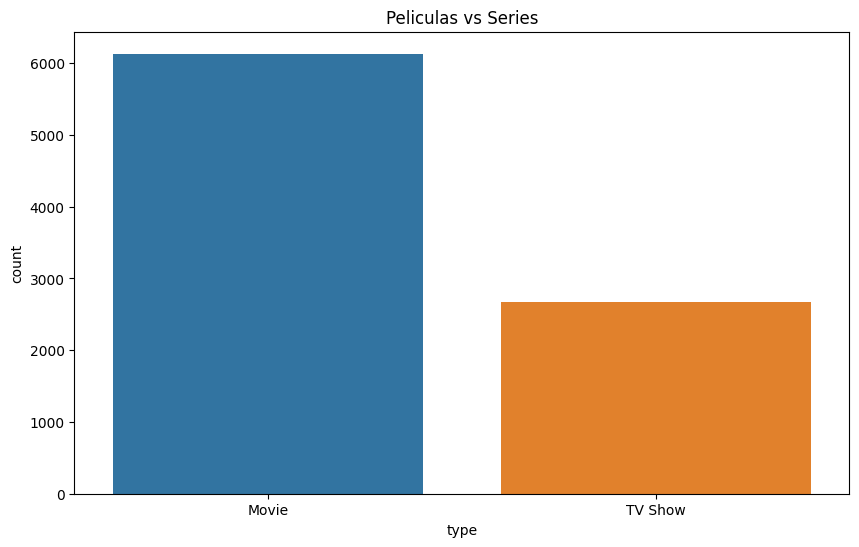

In [4]:
plt.figure(figsize = (10,6))
plt.title("Peliculas vs Series")	
sns.countplot(x = "type",data = df_resultado_merge, hue = "type")

Podemos observar, que hay muchas más peliculas que series en nuestro cojunto de datos de Netflix

#### Ejercicio 2: ¿Cuál es la distribución de calificaciones (rating) en los títulos? En esta gráfica deberás:

- Mostrar los resultados ordenados de mayor a menor. 

- Rotar las etiquetas del eje X. 

- Quitar el nombre del eje X. 

- Cambiar el nombre del ehje Y. 

- Ponerle título a la gráfica. 



Text(0.5, 1.0, 'Distribuición por calificaciones')

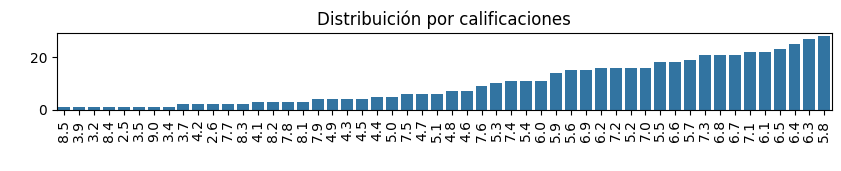

In [39]:
plt.figure(figsize = (10,1))
sns.countplot(x = "IMDB Score",
              data = df_resultado_merge,
              order=df_resultado_merge['IMDB Score'].value_counts(ascending=True).index #Con esto te cambias el orden
              )
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(rotation = 90)
plt.title("Distribuición por calificaciones")


#### Ejercicio 3: ¿Cuál es el top 10 de países con más títulos disponibles? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 



In [64]:
df_peli_porpais = df_resultado_merge.groupby("country")["title"].count().nlargest(10).reset_index()
df_peli_porpais

,country,title
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


C:\Users\almaz\AppData\Local\Temp\ipykernel_1132\1205868895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "country",


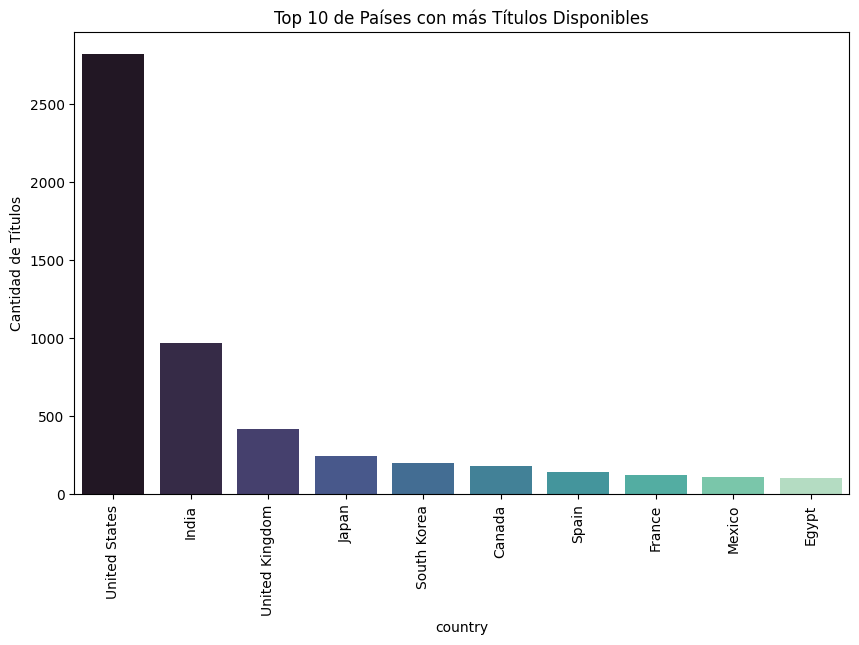

In [76]:
plt.figure(figsize = (10,6))
sns.barplot(x = "country",
            y = "title",
              data = df_peli_porpais,
              palette="mako")
              
plt.ylabel('Cantidad de Títulos')
plt.title('Top 10 de Países con más Títulos Disponibles')
plt.xticks(rotation=90) 
plt.show()

#### Ejercicio 5: ¿Cuál es la puntuación promedio de las películas según su calificación? Deberás:


- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 

- Cambia el tamaño de la gráfica a 15 x 5

C:\Users\almaz\AppData\Local\Temp\ipykernel_1132\3282457241.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "rating",


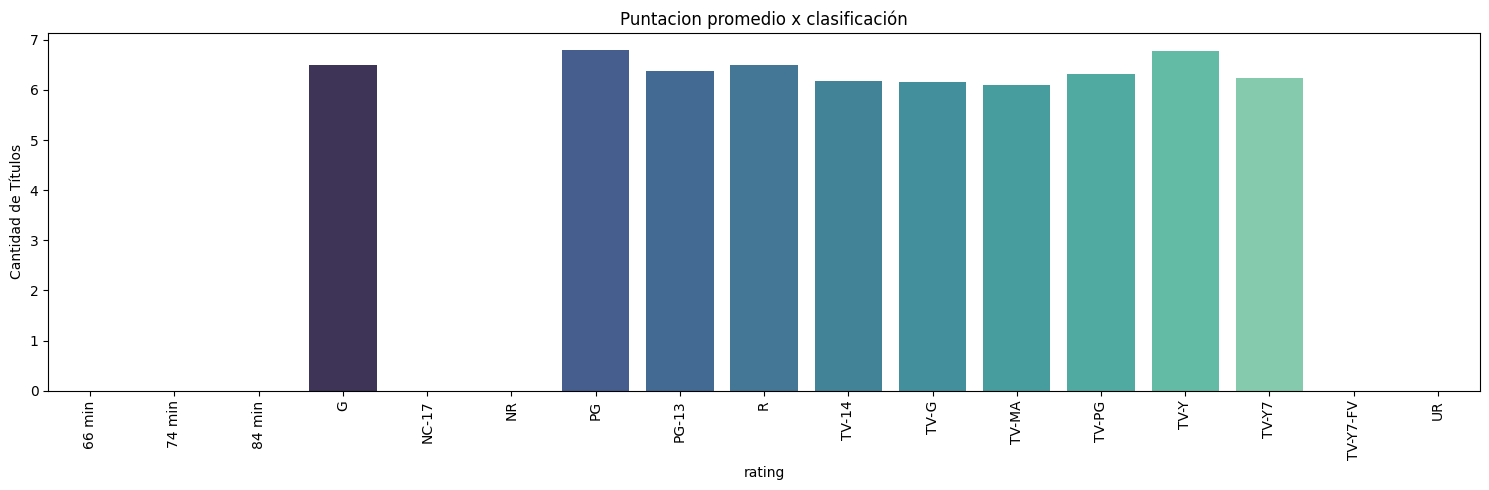

In [106]:
df_peli_porpais = df_resultado_merge.groupby("rating")["IMDB Score"].mean().reset_index()
df_peli_porpais
plt.figure(figsize = (15,5))
sns.barplot(x = "rating",
            y = "IMDB Score",
              data = df_peli_porpais,
              palette="mako")

plt.ylabel('Cantidad de Títulos')
plt.title("Puntacion promedio x clasificación")
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

#### Ejercicio 6: ¿Cuál es la relación entre la duración de las películas y su puntuación en IMDb? Deberás:

- Cambiar el tamaño de los puntos. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 


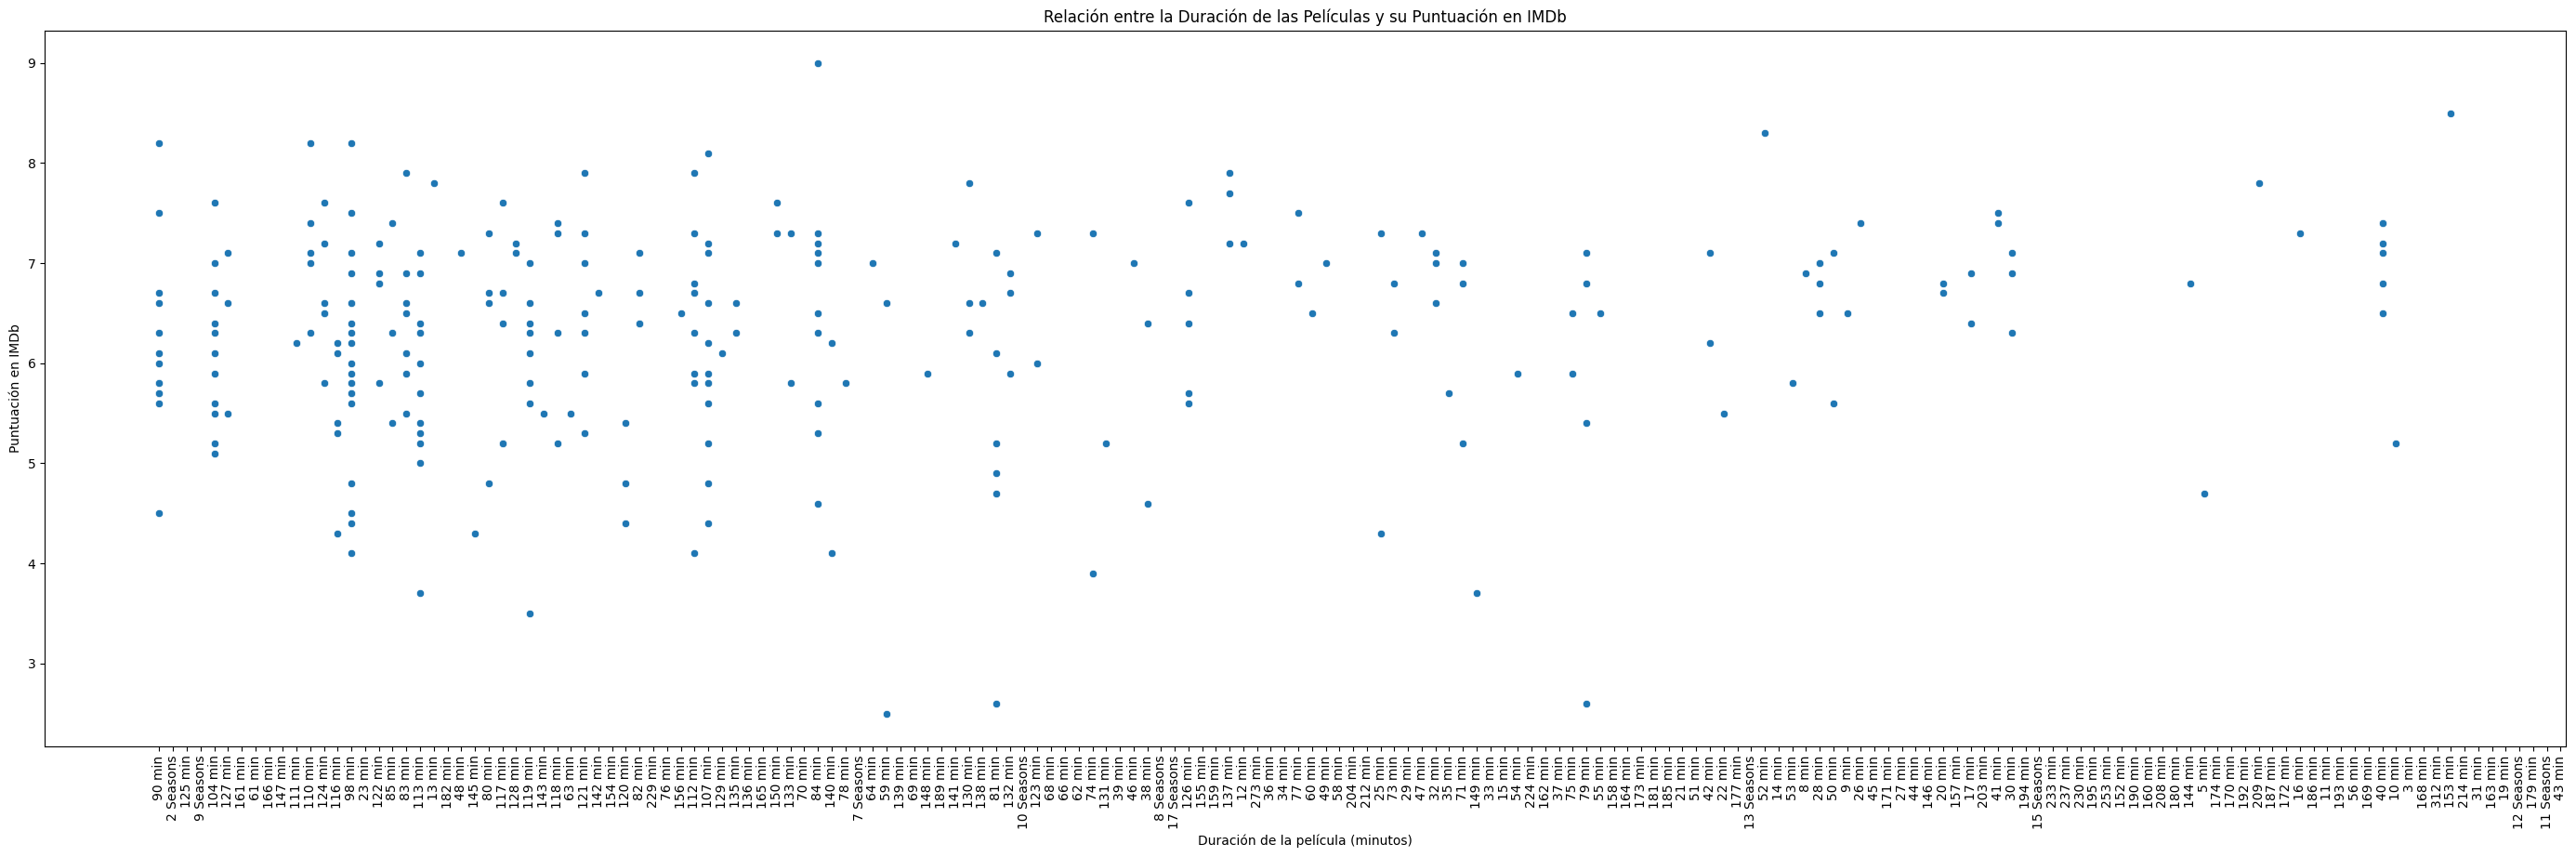

In [115]:
plt.figure(figsize=(35, 10))
sns.scatterplot(x="duration", y="IMDB Score",
                data=df_resultado_merge,
)

plt.xlabel("Duración de la película (minutos)")
plt.ylabel("Puntuación en IMDb")
plt.title("Relación entre la Duración de las Películas y su Puntuación en IMDb")
plt.xticks(rotation=90) 
plt.show()


#### Ejercicio 7: ¿Cómo se distribuye la puntuación en IMDb según los 10 idiomas más usados? Deberás:

- Usa una gráfica que nos muestre la mediana y los cuartiles. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

In [124]:
df_idi_IMDB = df_resultado_merge.groupby("Language")["IMDB Score"].mean().reset_index()
df_7 = df_idi_IMDB.nlargest(10, "IMDB Score").reset_index()
df_7

,index,Language,IMDB Score
0,13,English/Ukranian/Russian,8.4
1,3,English/Akan,7.7
2,5,English/Hindi,7.3
3,4,English/Arabic,7.3
4,7,English/Korean,7.3
5,8,English/Mandarin,7.3
6,9,English/Russian,7.3
7,31,Spanish/English,7.3
8,21,Khmer/English/French,7.2
9,33,Tamil,7.2


C:\Users\almaz\AppData\Local\Temp\ipykernel_1132\4219313078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = "Language",


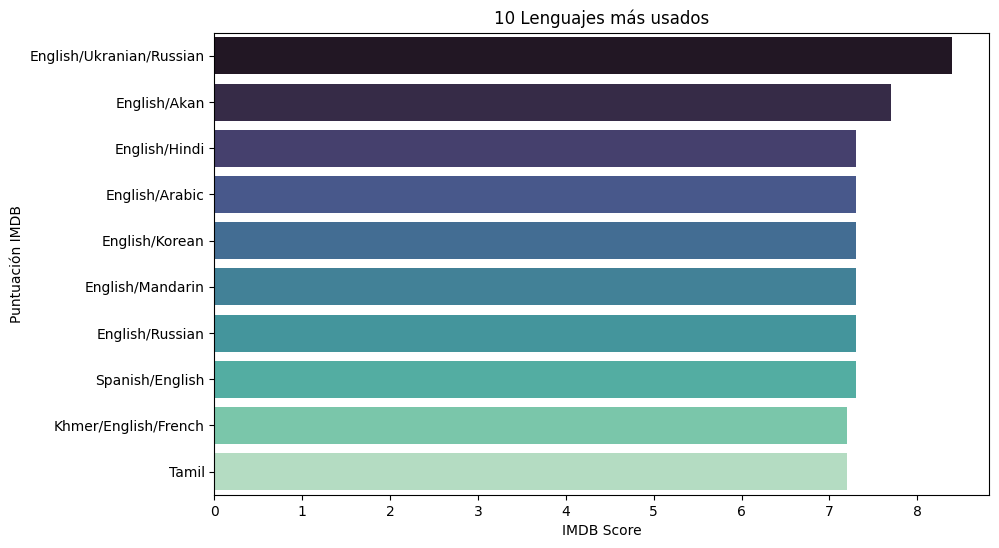

In [130]:
plt.figure(figsize = (10,6))
sns.barplot(y = "Language",
            x = "IMDB Score",
              data = df_7,
              palette="mako")
              
plt.ylabel('Puntuación IMDB')
plt.title('10 Lenguajes más usados')
plt.xticks(rotation=0) 
plt.show()

#### Ejercicio 8: ¿Cuáles son los 10 directores que tienen las puntuaciones más altas?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Cambiar el tamaño de la gráfica. 



#### Ejercicio 9:  ¿Cuál es la distribución de títulos por tipo y calificación? Soluciona este ejercicio usando subplots. Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 


#### EEn el ejercicio 10, tenemos que sacar el numero de pelis y series (el tipo) para los 6 principales paises, mostrando cada pais en un subplot. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 



#### Ejercicio 11: ¿Cuál es total de tipos de calificaciones, considerando solo los principales 5 países? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

#### Ejercicio 12: ¿Cómo se distribuyen las 5 primeras calificaciones  a lo largo de los aúltimo 10 años? 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 


### BONUS

#### Ejercicio 13: ¿Cómo ha evolucionado la cantidad de títulos añadidos a lo largo de los años diferenciando entre Películas y Series?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

- Añade una *grid* al gráfico. 

#### Ejercicio 14: ¿Cómo se distribuyen los títulos según su calificación (rating)? Utiliza un gráfico de “quesitos” para visualizar la proporción de títulos en cada categoría de calificación.

#### Ejercicio 15: ¿Cómo se distribuyen los títulos según su calificación (rating) y tipo (Películas vs Series)? Utiliza un gráfico countplot con el parámetro hue para diferenciar entre películas y series en cada calificación.